In [16]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv("cluster_data.csv")
data.shape

(707, 19)

In [18]:
data

,Cust_id,med_Actual_price_12,AVG_Actual_price_12,TOTAL_DAILY_ORDER_NET_AMT_12,AVG_DAILY_ORDER_NET_AMT_12,TOTAL_LINE_ITEM_QTY_12,AVG_LINE_ITEM_QTY_12,TOTAL_DOLLAR_DISCOUNT_12,AVG_DOLLAR_DISCOUNT_12,SIZE_NET_SALES,SIZE_QTY,SIZE_DOLLAR_DISC,RATIO_DISC_SALES,med_DAILY_ORDER_NET_AMT_12,med_LINE_ITEM_QTY_12,med_DOLLAR_DISCOUNT_12,MONTH_SINCE_LAST_TRANSACTION,count,sum_value_12
0,1,300.000,300.000000,1200.00,400.000000,4,1.333333,0.00,0.000000,0.007552,0.038395,0.000000,0.000000,300.000,1.0,0.000,11,1,1200
1,2,1625.630,2563.282500,41012.52,2563.282500,16,1.000000,78737.48,4921.092500,0.258091,0.153580,0.379631,1.919840,1625.630,1.0,4043.750,2,5,119750
2,4,3510.000,3510.000000,7020.00,3510.000000,2,1.000000,780.00,390.000000,0.044177,0.019198,0.003761,0.111111,3510.000,1.0,390.000,4,1,7800
3,8,4950.000,4530.000000,13590.00,4530.000000,3,1.000000,1510.00,503.333333,0.085522,0.028796,0.007280,0.111111,4950.000,1.0,550.000,1,3,15100
4,9,1890.000,2428.076923,33455.00,2573.461538,15,1.153846,17445.00,1341.923077,0.210532,0.143982,0.084111,0.521447,1890.000,1.0,474.500,6,4,50900
5,10,272.400,743.750000,8925.00,743.750000,12,1.000000,24075.00,2006.250000,0.056165,0.115185,0.116077,2.697479,272.400,1.0,733.200,7,1,33000
6,11,268.875,1649.357143,14772.00,2110.285714,19,2.714286,20748.00,2964.000000,0.092960,0.182377,0.100036,1.404549,1075.500,4.0,3704.500,1,3,35520
7,12,1890.000,2257.916667,37265.00,3105.416667,17,1.416667,15330.00,1277.500000,0.234508,0.163179,0.073913,0.411378,2025.000,1.0,550.000,3,5,52595
8,13,472.500,472.500000,1890.00,472.500000,4,1.000000,6510.00,1627.500000,0.011894,0.038395,0.031388,3.444444,472.500,1.0,1627.500,1,1,8400
9,14,3900.000,2800.000000,8400.00,2800.000000,3,1.000000,1500.00,500.000000,0.052861,0.028796,0.007232,0.178571,3900.000,1.0,125.000,9,3,9900


In [19]:
data.columns

Index(['Cust_id', 'med_Actual_price_12', 'AVG_Actual_price_12',
       'TOTAL_DAILY_ORDER_NET_AMT_12', 'AVG_DAILY_ORDER_NET_AMT_12',
       'TOTAL_LINE_ITEM_QTY_12', 'AVG_LINE_ITEM_QTY_12',
       'TOTAL_DOLLAR_DISCOUNT_12', 'AVG_DOLLAR_DISCOUNT_12', 'SIZE_NET_SALES',
       'SIZE_QTY', 'SIZE_DOLLAR_DISC', 'RATIO_DISC_SALES',
       'med_DAILY_ORDER_NET_AMT_12', 'med_LINE_ITEM_QTY_12',
       'med_DOLLAR_DISCOUNT_12', 'MONTH_SINCE_LAST_TRANSACTION', 'count',
       'sum_value_12'],
      dtype='object')

In [20]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(data)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([7.35442197e+00, 4.01533726e+00, 2.67618471e+00, 1.06298195e+00,
       1.00930050e+00, 8.96574126e-01, 5.90793096e-01, 5.04696501e-01,
       2.60057931e-01, 1.65342457e-01, 1.45236844e-01, 1.09797148e-01,
       7.32891823e-02, 4.76113642e-02, 3.94791670e-02, 2.35415527e-02,
       1.78627127e-02, 5.23170160e-03, 2.25982854e-03])

In [21]:
fa = FactorAnalyzer(5)
factors = fa.fit_transform(data)

In [22]:
factors.shape

(707, 5)

In [23]:
factors_df = pd.DataFrame(factors)

In [24]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [25]:
K = 6
kmeans_model = KMeans(n_clusters=K, max_iter=2000).fit(factors)

In [26]:
factors_df['Cluster'] = kmeans_model.labels_

# R-Square

In [27]:
r_2 = factors_df.groupby("Cluster").mean().mean(axis=1).var()/factors.var()

In [28]:
r_2

3.936470957023009

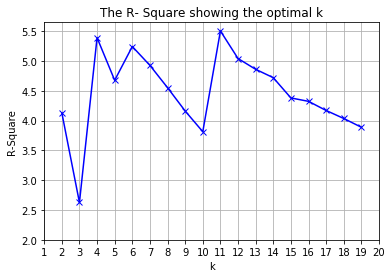

In [29]:
K = range(1,20)
r_2 = []
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(factors)
    kmeanModel.fit(factors)
    factors_df['Cluster'] = kmeanModel.labels_
    r_2.append(factors_df.groupby("Cluster").mean().mean(axis=1).var()/factors.var())


plt.plot(K, r_2, 'bx-')
plt.xticks([i for i in range(1,21)])
plt.yticks([i/10 for i in range(20,60,5)])
plt.grid(True)
plt.xlabel('k')
plt.ylabel('R-Square')
plt.title('The R- Square showing the optimal k')
plt.show()

# Centroids

In [30]:
centroid = factors_df.groupby("Cluster").mean().mean(axis=1)
centroid

Cluster
0    -0.091087
1     0.678277
2    -0.377307
3     3.175957
4     4.945287
5     0.392932
6     3.471544
7     0.276571
8     1.207205
9     1.880207
10   -0.185315
11    0.114092
12    0.061254
13    6.680326
14    1.113075
15    0.992810
16    0.064192
17    2.915069
18   -0.000462
dtype: float64

# Sample in clusters

In [31]:
factors_df['Cluster'].value_counts()

2     193
0     106
10    101
12     88
16     43
11     41
5      40
7      28
18     26
1      11
15      8
9       6
14      5
8       4
6       2
3       2
17      1
13      1
4       1
Name: Cluster, dtype: int64

# RMSTD

In [32]:
factors_df.groupby("Cluster").var().mean(axis=1).apply(np.sqrt)

Cluster
0     0.257535
1     0.646962
2     0.193625
3     1.486480
4          NaN
5     0.350098
6     0.823819
7     0.564157
8     0.794768
9     0.774531
10    0.254005
11    0.378743
12    0.217389
13         NaN
14    0.825491
15    0.725754
16    0.425036
17         NaN
18    0.419684
dtype: float64

# Elbow Method

To check the optimal no. of clusters

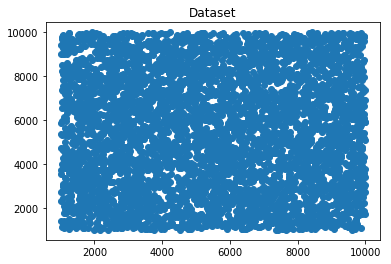

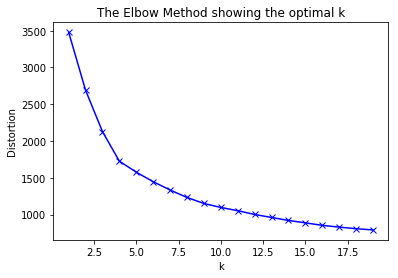

In [38]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

x1 = np.random.randint(1000,10000,5000)
x2 = np.random.randint(1000,10000,5000)
plt.plot()
# plt.xlim([0, 10])
# plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



In [41]:
factors_df

,0,1,2,3,4,Cluster
0,-0.222343,-0.456227,-1.181607,-0.467116,-0.567355,2
1,0.345270,-0.373138,-0.105134,0.916055,0.637266,16
2,-0.286800,-0.220208,0.406176,-0.232628,-0.318043,0
3,-0.281868,-0.147284,0.969810,-0.225542,-0.145580,12
4,0.014650,-0.188670,-0.190532,-0.175281,0.448725,11
5,-0.062344,-0.418506,-1.031163,0.341512,-0.237371,10
6,-0.089046,1.209881,-0.703651,0.653742,0.216303,18
7,0.040194,-0.151859,-0.264924,-0.389349,0.477331,11
8,-0.205616,-0.532150,-1.084908,0.292010,-0.432348,10
9,-0.294344,-0.238029,0.208013,-0.205372,-0.429759,0


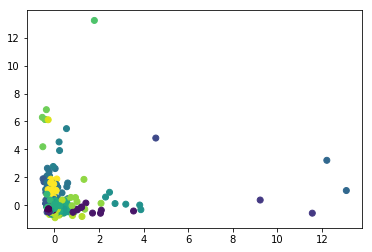

In [42]:
plt.scatter(factors_df[0], factors_df[1], c=factors_df.Cluster)

In [43]:
plt.show()